# 1. Regressão Linear
## 1.1. Univariada

Existem diversos problemas na natureza para os quais procura-se obter valores de saída dado um conjunto de dados de entrada. Suponha o problema de predizer os valores de imóveis de uma determinada cidade, conforme apresentado na Figura 1, em que podemos observer vários pontos que representam diferentes imóveis, cada qual com seu preço de acordo com o seu tamanho. 

Em problemas de **regressão**, objetiva-se estimar valores de saída de acordo com um conjunto de valores de entrada. Desta forma, considerando o problema anterior, a ideia consiste em estimar o preço de uma casa de acordo com o seu tamanho, isto é, gostaríamos de encontrar uma **linha reta** que melhor se adequa ao conjunto de pontos na Figura 1.

In [2]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from matplotlib import pyplot
import numpy

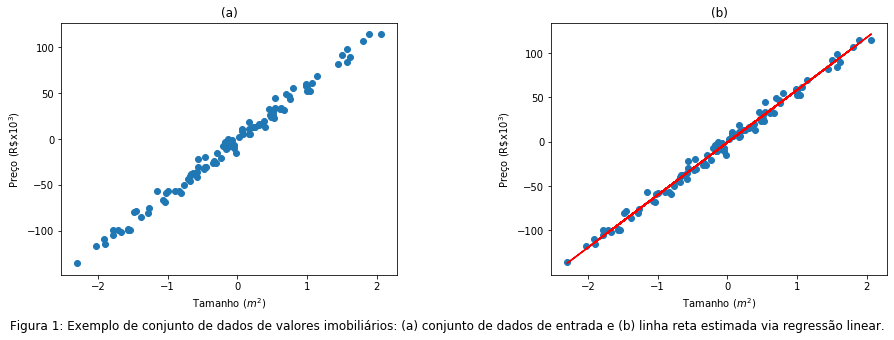

In [3]:
# gerando um conjunto de pontos aleatórios para um problema de regressão linear ***
x, y = make_regression(n_samples=100, n_features=1, noise=5.7)

# apresenta o conjunto de dados criado no passo anterior ***
fig = pyplot.figure(figsize=(15,7))

pyplot.subplot(1, 2, 1)
pyplot.scatter(x,y)
pyplot.xlabel("Tamanho ($m^2$)")
pyplot.ylabel("Preço (R\$x$10^3$)")
pyplot.title("(a)")

# executando regressor linear
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) #criando partições
model = LinearRegression()  
model.fit(x_train, y_train) # treinando o algoritmo

pyplot.subplot(1, 2, 2)
pyplot.scatter(x,y)
pyplot.plot(x, model.predict(x), color = 'red')
pyplot.xlabel("Tamanho ($m^2$)")
pyplot.ylabel("Preço (R\$x$10^3$)")
pyplot.title("(b)")

fig.tight_layout(pad=10)
fig.suptitle("Figura 1: Exemplo de conjunto de dados de valores imobiliários: (a) conjunto de dados de entrada e (b) linha reta estimada via regressão linear.", y=0.18)
pyplot.show()

Seja um conjunto de dados ${\cal D}=\{(x_1,y_1),(x_2,y_2),\ldots,(x_m,y_m)\}$ tal que $x_i\in\Re$ denota o conjunto dos dados de **entrada** (isto é, o tamanho da casa) e $y_i\in\Re$ representa o seu valor. Além disso, seja ${\cal D}_{tr}\subset {\cal D}$ o chamado **conjunto de treinamento** e ${\cal D}_{ts}\subset {\cal D}\backslash{\cal D}_{tr}$ o **conjunto de teste**. Usualmente, técnicas de aprendizado de máquina são avaliadas em conjuntos de treinamento e teste disjuntos, ou seja, temos que ${\cal D}_{tr}$ e ${\cal D}_{ts}$ são denominados **partições** do conjunto original ${\cal D}$. Em nosso exemplo, temos que $x_i$ e $y_i$ correspondem ao tamanho e preço do imóvel, respectivamente.

Basicamente, um algoritmo de regressão linear recebe como entrada um conjunto de dados de treinamento e objetiva estimar uma função linear (reta) a qual chamamos de **função hipótese**, dada por:
\begin{equation}
h_\textbf{w}(x) = w_0+w_1x,
\tag{1}
\end{equation}
em que $\textbf{w}=[w_0\ w_1]$ corresponde aos parâmetros do modelo. Dependendo dos valores assumidos por $\textbf{w}$, a função hipótese pode assumir diferentes comportamentos, conforme ilustra a Figura 2.

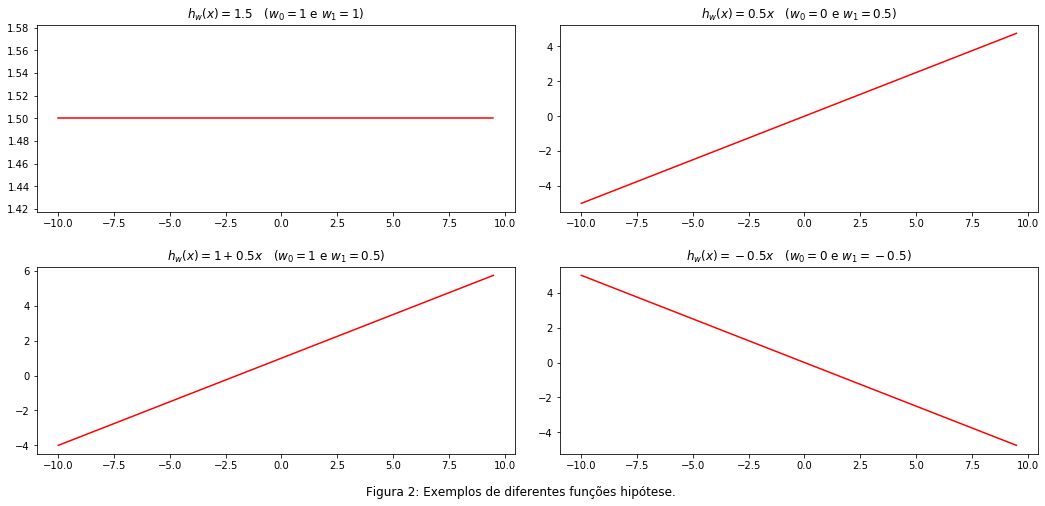

In [14]:
fig = pyplot.figure(figsize=(15,7))

x = numpy.arange(-10, 10, 0.5)

pyplot.subplot(2, 2, 1)
y = 1.5 + 0*x #h_w(x) = 1.5 + w_1*0
pyplot.plot(x, y, color = "red")
pyplot.title("$h_w(x) = 1.5$   $(w_0 = 1$ e $w_1 = 1)$")

pyplot.subplot(2, 2, 2)
y = 0 + 0.5*x #h_w(x) = 0 + 0.5*x
pyplot.plot(x, y, color = "red")
pyplot.title("$h_w(x) = 0.5x$   $(w_0 = 0$ e $w_1 = 0.5)$")

pyplot.subplot(2, 2, 3)
y = 1 + 0.5*x #h_w(x) = 1 + 0.5*x
pyplot.plot(x, y, color = "red")
pyplot.title("$h_w(x) = 1 + 0.5x$   $(w_0 = 1$ e $w_1 = 0.5)$")

pyplot.subplot(2, 2, 4)
y = 0 - 0.5*x #h_w(x) = 0 - 0.5*x
pyplot.plot(x, y, color = "red")
pyplot.title("$h_w(x) = -0.5x$   $(w_0 = 0$ e $w_1 = -0.5)$")

fig.tight_layout(pad=2)
fig.suptitle("Figura 2: Exemplos de diferentes funções hipótese.", y=0.01)
pyplot.show()

De maneira geral, o objetivo da regressão linear é encontrar valores para $\textbf{w}=[w_0\ w_1]$ de tal forma que $h_w(x_i)$ é o mais próximo possível de $y_i$ considerando o conjunto de treinamento ${\cal D}_{tr}$, $\forall i\in\{1,2,\ldots,m^\prime\}$, em que $m^\prime=\left|{\cal D}_{tr}\right|$. Em outras palavras, o objetivo consiste em resolver o seguinte problema de minimização:

\begin{equation}
\label{e.mse}
\underset{\textbf{w}}{\operatorname{argmin}}\frac{1}{2m^\prime}\sum_{i=1}^{m^\prime}(h_\textbf{w}(x_i)-y_i)^2.
\tag{3}
\end{equation}
Essa equação é também conhecida por **erro médio quadrático**, do inglês *Minimum Square Error* (MSE). Uma outra denominação bastante comum é a de **função de custo**. Note que $h_w(x_i)$ representa o **preço estimado** do imóvel pela técnica de regressão linear, ao passo que $y_i$ denota o seu **valor rea**l dado pelo conjunto de treinamento.

Podemos simplificar a Equação \ref{e.mse} e reescrevê-la da seguinte maneira:

\begin{equation}
\label{e.mse_simplified}
\underset{\textbf{w}}{\operatorname{argmin}}J(\textbf{w}),
\tag{4}
\end{equation}
em que $J(\textbf{w})=\frac{1}{2m^\prime}\sum_{i=1}^{m^\prime}(h_\textbf{w}(x_i)-y_i)^2$. Partindo desta premissa, vamos simplificar um pouco mais a notação e assumir que nossa função hipótese cruza a origem do plano cartesiano:

\begin{equation}
\label{e.hypothesis_origin}
h_w(\textbf{x}) = w_1x,
\tag{5}
\end{equation}
ou seja, $w_0=0$. Neste caso, nosso problema de otimização restringe-se a encontrar $w_1$ que minimiza a seguinte equação:

\begin{equation}
\label{e.mse_simplified_origin}
\underset{w_1}{\operatorname{argmin}}J(w_1).
\tag{5}
\end{equation}

Como exemplo, suponha o seguinte conjunto de treinamento ${\cal D}_{tr}=\{(1,1),(2,2),(3,3)\}$, o qual é ilustrado na Figura 3a. Como pode ser observado, a função hipótese que modela esse conjunto de treinamento é dada por $h_\textbf{w}(x)=x$, ou seja, $\textbf{w}=[0\ 1]$, conforme apresentado na Figura 3b.

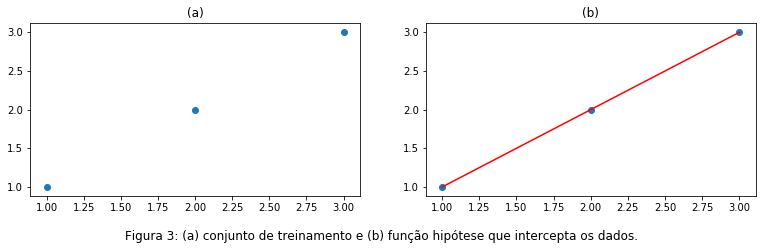

In [25]:
fig = pyplot.figure(figsize=(13,7))
x = numpy.arange(1, 4, 1)

pyplot.subplot(2, 2, 1)
y = x #h_w(x) = x
pyplot.scatter(x,y)
pyplot.title("(a)")

pyplot.subplot(2, 2, 2)
pyplot.scatter(x,y)
pyplot.plot(x, x, color = "red")
pyplot.title("(b)")

fig.suptitle("Figura 3: (a) conjunto de treinamento e (b) função hipótese que intercepta os dados.", y=0.47)

pyplot.show()